In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets

from IPython.display import display

In [2]:
NUM_STATES = 16
NUM_OBSERVATIONS = 2
NUM_BELIEFS = 2 # TARGET vs. NON TARGET
ANGLE_RANGE = 2*np.pi

STATE_STEP = ANGLE_RANGE/NUM_STATES
STATE_CENTERS = np.arange(0, ANGLE_RANGE, STATE_STEP) + STATE_STEP
ANGL_DIST_BETWEEN_STATES = (STATE_CENTERS[np.newaxis, :] - STATE_CENTERS[:, np.newaxis])

PRIOR_TARGET_PROB = np.array([1/NUM_BELIEFS, 1-(1/NUM_BELIEFS)])
PRIOR_STATE_PROB = np.full(NUM_STATES, 1/NUM_STATES)
LIKELIHOOD_OBS_DIST_FROM_NONTARGET = np.vstack([np.ones(NUM_STATES), np.zeros(NUM_STATES)])
LIKELIHOOD_OBS_DIST_FROM_NONTARGET

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
STATE_STEP, PRIOR_STATE_PROB

(0.39269908169872414,
 array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625]))

In [4]:
def get_stochastic_state_transition_matrix(candidate_step):
    if candidate_step>0:
        mod_basis = 2*np.pi
    else:
        mod_basis = -2*np.pi

    angular_dist_between_states_in_extent = ANGL_DIST_BETWEEN_STATES % mod_basis
    angular_dist_after_action = (angular_dist_between_states_in_extent - candidate_step)
    angular_dist_after_action_in_extent = angular_dist_after_action % mod_basis
    
    sigma = STATE_STEP/2
    magnitude = 1 / np.sqrt((2*np.pi) * (sigma**2))
    state_transition = magnitude * np.exp(-0.5*((angular_dist_after_action_in_extent/sigma)**2))
    state_transition_normed = state_transition / state_transition.sum(axis=1)
    return state_transition_normed

def get_deterministic_state_transition_matrix(candidate_step):
    if candidate_step!=0:
        shift = int(candidate_step / np.abs(candidate_step))
    else:
        shift = 0

    state_matrix = np.eye(NUM_STATES)
    state_transition_matrix = np.roll(state_matrix, shift, axis=1)
    
    return state_transition_matrix

In [5]:
candidate_step = -STATE_STEP
state_transition_matrix = get_deterministic_state_transition_matrix(candidate_step)
state_transition_matrix.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [6]:
candidate_step = 0
state_transition_matrix = get_deterministic_state_transition_matrix(candidate_step)
state_transition_matrix.round(3)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [7]:
candidate_step = STATE_STEP
state_transition_matrix = get_deterministic_state_transition_matrix(candidate_step)
state_transition_matrix.round(3)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [8]:
obs1_bounds = np.array([60, 120])

In [9]:
def observe_angle_state_pair(initial_angle):
   plt.figure(figsize=(6, 6))
   radius = 1
   radius_until = 5
   pie = np.pi
   theta_obs1 = np.linspace(np.radians(obs1_bounds[0]), np.radians(obs1_bounds[1]), 30)
   x_inner = radius * np.cos(theta_obs1)
   y_inner =  radius * np.sin(theta_obs1)
   x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
   y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
   plt.fill(x_poly, y_poly, facecolor='blue', alpha=0.25, linewidth=0)
   plt.plot(x_inner, y_inner, color='blue', linewidth=1)

   theta_obs0 = np.linspace(np.radians(obs1_bounds[1]), np.radians(obs1_bounds[0])+2*pie, 30)
   x_inner = radius * np.cos(theta_obs0)
   y_inner =  radius * np.sin(theta_obs0)
   x_poly = np.concatenate([radius_until*x_inner, x_inner[::-1]])
   y_poly = np.concatenate([radius_until*y_inner, y_inner[::-1]])
   plt.fill(x_poly, y_poly, facecolor='orange', alpha=0.25, linewidth=0)
   plt.plot(x_inner, y_inner, color='orange', linewidth=1)

   for theta in STATE_CENTERS:
      r_outer = 4 * radius_until * radius
      plt.plot([radius*np.cos(theta), r_outer*np.cos(theta)], 
               [radius*np.sin(theta), r_outer*np.sin(theta)],
                  color='k', linewidth=1.5, solid_capstyle='round', zorder=1)
      # plt.plot([radius*np.cos(theta + (STATE_STEP/2)), r_outer*np.cos(theta + (STATE_STEP/2))], 
      #          [radius*np.sin(theta + (STATE_STEP/2)), r_outer*np.sin(theta + (STATE_STEP/2))],
      #             color='k', linewidth=1, linestyle='dashed', zorder=1)
      
   if initial_angle > obs1_bounds[0] and initial_angle < obs1_bounds[1]:
      code_received = 1
   else:
      code_received = 0
   initial_radians = np.radians((initial_angle % 360))
   initial_state = np.floor((initial_radians + (STATE_STEP/2)) / STATE_STEP) % NUM_STATES
   plt.scatter(radius_until*radius*np.cos(initial_radians), radius_until*radius*np.sin(initial_radians),
            s=200, marker='.', facecolor='r', edgecolor='k', zorder=4, label=f'State={initial_state}\nCode={code_received}')

   plt.gca().set_aspect('equal', adjustable='box')
   plt.xticks([])
   plt.yticks([])
   GRID_EXTENT = 7
   plt.xlim(-GRID_EXTENT, GRID_EXTENT)
   plt.ylim(-GRID_EXTENT, GRID_EXTENT)
   plt.legend()
   plt.show()


In [10]:
initial_angle_slider = widgets.IntSlider(
    value=0,  
    min=0,
    max=360,
    description="Initial Angle",
    style={'description_width': 'initial'},
    continuous_update=True,
    layout=widgets.Layout(width="600px"),
)

interactive_plot = widgets.interactive(
    observe_angle_state_pair, initial_angle=initial_angle_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Initial Angle', layout=Layout(width='600px'), max=360, s…

In [11]:
NUM_STATES

16

In [12]:
prob_code1_in_states = np.array([0.0, 0.0, 0.0, 1.0, 
                                 1.0, 1.0, 0.0, 0.0,
                                 0.0, 0.0, 0.0, 0.0,
                                 0.0, 0.0, 0.0, 0.0])
prob_code0_in_states = 1-prob_code1_in_states

EMISSION_MATRIX_B = np.vstack([prob_code0_in_states, prob_code1_in_states])
EMISSION_MATRIX_B

array([[1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
trial_num = 0
num_trials = 10
max_iter = 50
posterior_across_trials = np.zeros((num_trials, max_iter+1, NUM_BELIEFS))

In [14]:
while trial_num < num_trials:
    joint_prob_obs_state_t = np.zeros((max_iter, EMISSION_MATRIX_B.shape[0], EMISSION_MATRIX_B.shape[1]))
    joint_prob_received_obs_state_t = np.zeros((max_iter, EMISSION_MATRIX_B.shape[1]))
    joint_prob_obs_state_forecast_t = np.zeros((max_iter, EMISSION_MATRIX_B.shape[0], EMISSION_MATRIX_B.shape[1]))
    likelihood_received_obs_from_target_t = np.zeros(max_iter)
    angles_visited = np.zeros(max_iter)
    posterior_t = np.zeros((max_iter, NUM_BELIEFS))
    current_entropyS_t = np.zeros(max_iter)
    candidate_steps = np.array([-STATE_STEP, 0, STATE_STEP])
    expected_forecast_t_S_per_step = np.zeros((max_iter, candidate_steps.shape[0]))
    deltaS_t = np.zeros((max_iter, candidate_steps.shape[0]))
    code_received_t = np.zeros(max_iter)

    time_ind = 0
    initial_angle = 0

    while time_ind<max_iter:
        if time_ind<1:
            angles_visited[time_ind] = initial_angle
        else:
            angles_visited[time_ind] = angles_visited[time_ind-1] + np.rad2deg(step_to_take)

        angle_visited_radians = np.radians((angles_visited[time_ind] % 360))
        state_visited = np.floor((angle_visited_radians) / STATE_STEP)
        code_received_t[time_ind] = np.random.choice(np.array([0, 1]), p=EMISSION_MATRIX_B[:,int(state_visited)])
        print(f'Current angle: {angles_visited[time_ind]}, Code received: {code_received_t[time_ind]}')

        if time_ind<1:
            joint_prob_obs_state_t[time_ind] = PRIOR_STATE_PROB * EMISSION_MATRIX_B
        else:
            state_transition_matrix = get_deterministic_state_transition_matrix(step_to_take)
            joint_prob_obs_state_t[time_ind] = (joint_prob_received_obs_state_t[time_ind-1] @ state_transition_matrix) * EMISSION_MATRIX_B

        joint_prob_received_obs_state_t[time_ind] = joint_prob_obs_state_t[time_ind][int(code_received_t[time_ind])]
        likelihood_received_obs_from_target_t[time_ind] = joint_prob_received_obs_state_t[time_ind].sum()
        likelihood_received_obs_from_nontarget = (PRIOR_STATE_PROB*LIKELIHOOD_OBS_DIST_FROM_NONTARGET[int(code_received_t[time_ind])]).sum()

        if time_ind<1:
            likelihood_received_obs = np.array([likelihood_received_obs_from_target_t[time_ind], likelihood_received_obs_from_nontarget])
            posterior_t[time_ind] = (PRIOR_TARGET_PROB*likelihood_received_obs) / (PRIOR_TARGET_PROB*likelihood_received_obs).sum()
        else:
            likelihood_received_obs_from_target_given_obs_sequence = likelihood_received_obs_from_target_t[time_ind] / likelihood_received_obs_from_target_t[time_ind-1]
            likelihood_received_obs = np.array([likelihood_received_obs_from_target_given_obs_sequence, likelihood_received_obs_from_nontarget])
            posterior_t[time_ind] = (posterior_t[time_ind-1]*likelihood_received_obs) / (posterior_t[time_ind-1]*likelihood_received_obs).sum()

        if 1 in posterior_t[time_ind]:
            current_entropyS_t[time_ind] = 0
        else:
            current_entropyS_t[time_ind] = (-posterior_t[time_ind]*np.log2(posterior_t[time_ind])).sum()

        if int(time_ind+1)>1:
            print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|Δθ2:{int(time_ind+1)},T)={joint_prob_received_obs_state_t[time_ind].round(2)}, P(O1:{int(time_ind+1)}|Δθ2:{int(time_ind+1)},T)={likelihood_received_obs_from_target_t[time_ind]}, P(T|O1:{int(time_ind+1)},Δθ2:{int(time_ind+1)})={posterior_t[time_ind]}, H{int(time_ind+1)}={current_entropyS_t[time_ind]:.2f}")
        else:
            print(f"P(O1:{int(time_ind+1)},S{int(time_ind+1)}|T)={joint_prob_received_obs_state_t[time_ind].round(2)}, P(O1:{int(time_ind+1)}|T)={likelihood_received_obs_from_target_t[time_ind]}, P(T|O1:{int(time_ind+1)})={posterior_t[time_ind]}, H{int(time_ind+1)}={current_entropyS_t[time_ind]:.2f}")


        for i, forecast_t_candidate_step in enumerate(candidate_steps):
            state_transition_matrix = (get_deterministic_state_transition_matrix(forecast_t_candidate_step))

            joint_prob_obs_state_forecast_t[time_ind] = (joint_prob_received_obs_state_t[time_ind] @ state_transition_matrix) * EMISSION_MATRIX_B
            likelihood_obs_from_target_forecast_t = joint_prob_obs_state_forecast_t[time_ind].sum(axis=1)
            likelihood_obs_from_target_forecast_t_given_received_obs = likelihood_obs_from_target_forecast_t / likelihood_received_obs_from_target_t[time_ind]
            likelihood_forecasted_obs0_from_nontarget = (PRIOR_STATE_PROB*LIKELIHOOD_OBS_DIST_FROM_NONTARGET[0]).sum()
            likelihood_forecasted_obs1_from_nontarget = (PRIOR_STATE_PROB*LIKELIHOOD_OBS_DIST_FROM_NONTARGET[1]).sum()

            likelihood_obs0_forecast_t_given_received_obs = np.array([likelihood_obs_from_target_forecast_t_given_received_obs[0], likelihood_forecasted_obs0_from_nontarget])
            if (posterior_t[time_ind] * likelihood_obs0_forecast_t_given_received_obs).sum() > 0:
                posterior_forecast_given_received_obs0 = (posterior_t[time_ind] * likelihood_obs0_forecast_t_given_received_obs) / (posterior_t[time_ind] * likelihood_obs0_forecast_t_given_received_obs).sum()
            else:
                posterior_forecast_given_received_obs0 = np.array([0, 1])

            likelihood_obs1_forecast_t_given_received_obs = np.array([likelihood_obs_from_target_forecast_t_given_received_obs[1], likelihood_forecasted_obs1_from_nontarget])
            if (posterior_t[time_ind] * likelihood_obs1_forecast_t_given_received_obs).sum() > 0:
                posterior_forecast_given_received_obs1 = (posterior_t[time_ind] * likelihood_obs1_forecast_t_given_received_obs) / (posterior_t[time_ind] * likelihood_obs1_forecast_t_given_received_obs).sum()
            else:
                posterior_forecast_given_received_obs1 = np.array([0, 1])

            if 0 in posterior_forecast_given_received_obs0:
                forecasted_S0 = 0
            else:
                forecasted_S0 = (-posterior_forecast_given_received_obs0 * np.log2(posterior_forecast_given_received_obs0)).sum()

            if 0 in posterior_forecast_given_received_obs1:
                forecasted_S1 = 0
            else:
                forecasted_S1 = (-posterior_forecast_given_received_obs1 * np.log2(posterior_forecast_given_received_obs1)).sum()

            prob_obs0_at_forecast_t2_given_obs_at_t1 = (posterior_t[time_ind] * np.array([likelihood_obs_from_target_forecast_t_given_received_obs[0], likelihood_forecasted_obs0_from_nontarget])).sum()
            prob_obs1_at_forecast_t2_given_obs_at_t1 = (posterior_t[time_ind] * np.array([likelihood_obs_from_target_forecast_t_given_received_obs[1], likelihood_forecasted_obs1_from_nontarget])).sum()

            print(f'If Δθ{int(time_ind+2)}={forecast_t_candidate_step:.2f}, P(O1:{int(time_ind+2)},S{int(time_ind+1)}|T)=[{joint_prob_obs_state_forecast_t[time_ind][0].round(2)}, {joint_prob_obs_state_forecast_t[time_ind][1].round(2)}]')
            print(f'P(O{int(time_ind+2)}|O1:{int(time_ind+1)},Δθ2:{int(time_ind+2)},T)={likelihood_obs_from_target_forecast_t_given_received_obs}')
            expected_forecast_t_S = (forecasted_S0 * prob_obs0_at_forecast_t2_given_obs_at_t1) + (forecasted_S1 * prob_obs1_at_forecast_t2_given_obs_at_t1)
            print(f'S{int(time_ind+2)}={prob_obs0_at_forecast_t2_given_obs_at_t1:.3f}x{forecasted_S0:.3f} + {prob_obs1_at_forecast_t2_given_obs_at_t1:.3f}x{forecasted_S1:.3f}={expected_forecast_t_S}')
            expected_forecast_t_S_per_step[time_ind, i] = expected_forecast_t_S

        deltaS_t[time_ind] = current_entropyS_t[time_ind] - expected_forecast_t_S_per_step[time_ind]
        print(f'S{int(time_ind+1)}={current_entropyS_t[time_ind]}, S{int(time_ind+2)}={expected_forecast_t_S_per_step[time_ind]}, ΔS{int(time_ind+1)}→{int(time_ind+2)}={deltaS_t[time_ind]}')

        unique, counts = np.unique(deltaS_t[time_ind], return_counts=True)
        frequent_cond = counts>1
        unique_frequent_delta_S = unique[frequent_cond]
        if (counts[unique==deltaS_t[time_ind].max()]==1).all():
            print('Choosing according to max ΔS')
            step_to_take = candidate_steps[deltaS_t[time_ind].argmax()]
        else:
            if deltaS_t[time_ind].sum()>0:
                print(f'Choosing randomly between {candidate_steps[np.where(deltaS_t[time_ind]==unique_frequent_delta_S)[0]]}')
                step_to_take = candidate_steps[np.random.choice(np.where(deltaS_t[time_ind]==unique_frequent_delta_S)[0])]
            else:
                step_to_take = 0

        time_ind+=1

    posterior_across_trials[trial_num,:,:] = np.vstack([PRIOR_TARGET_PROB, posterior_t[:time_ind]])
    trial_num+=1

Current angle: 0.0, Code received: 0.0
P(O1:1,S1|T)=[0.06 0.06 0.06 0.   0.   0.   0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.06], P(O1:1|T)=0.8125, P(T|O1:1)=[0.44827586 0.55172414], H1=0.99
If Δθ2=-0.39, P(O1:2,S1|T)=[[0.06 0.06 0.   0.   0.   0.   0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.06], [0.   0.   0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]]
P(O2|O1:1,Δθ2:2,T)=[0.92307692 0.07692308]
S2=0.966x0.985 + 0.034x0.000=0.9512547520330705
If Δθ2=0.00, P(O1:2,S1|T)=[[0.06 0.06 0.06 0.   0.   0.   0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.06], [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
P(O2|O1:1,Δθ2:2,T)=[1. 0.]
S2=1.000x0.992 + 0.000x0.000=0.9922666387194963
If Δθ2=0.39, P(O1:2,S1|T)=[[0.06 0.06 0.06 0.   0.   0.   0.   0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.06], [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]]
P(O2|O1:1,Δθ2:2,T)=[0.92307692 0.07692308]
S2=0.966x0.985 + 0.034x0.000=0.95125475203307

In [15]:
num_obs_to_complete_for_trial = np.zeros(num_trials)

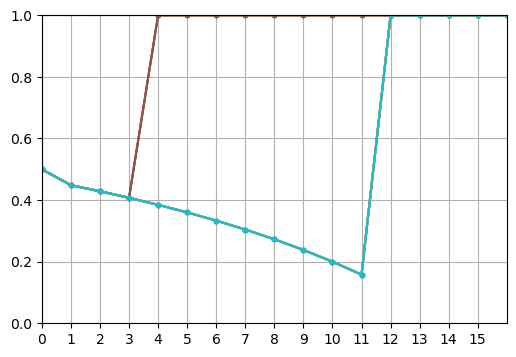

In [25]:
plt.figure(figsize=(6,4))
for trial_i in range(num_trials): 
    plt.plot(posterior_across_trials[trial_i,:,0], marker='.')
    num_obs_to_complete_for_trial[trial_i] = np.where(posterior_across_trials[trial_i,:,0]==1)[0][0]
plt.axhline(y=1.0, linestyle='dashed', color='k')
plt.xticks(np.arange(NUM_STATES))
plt.grid(which='both')
plt.xlim(0, NUM_STATES)
plt.ylim(0, 1.0)
plt.show()

In [19]:
counts, num_obses = np.histogram(num_obs_to_complete_for_trial, bins=np.arange(NUM_STATES+2))

Text(0, 0.5, 'Number of trials')

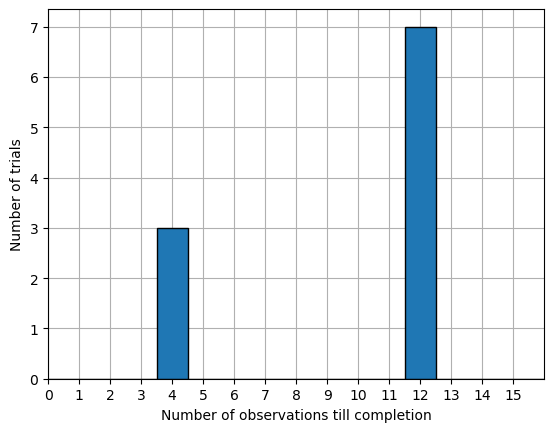

In [23]:
plt.grid(which='both', zorder=1)
plt.hist(num_obs_to_complete_for_trial, bins=np.arange(NUM_STATES+2)-0.5, edgecolor='k', zorder=2)
plt.xlabel('Number of observations till completion')
plt.xticks(np.arange(NUM_STATES))
plt.xlim(0, NUM_STATES)
plt.ylabel('Number of trials')